# Referencias

Se puede encontrar la base de datos de Titanic en [kaggle](https://www.kaggle.com/c/titanic#). Adicionalmente, se puede encontrar un ejemplo de [Análisis Exploratorio](https://www.kaggle.com/aselad/exploratory-data-analysis-on-the-titanic-dataset) propuesto por la misma plataforma.

De acuerdo con la [descripción](https://www.kaggle.com/c/titanic#) de la base de datos, la variable objetivo $y$ corresponde a la columna `Survived`, y las variables independientes o predictoras $[x_1,...,x_n]$ son el resto de las columnas.

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
path_universal = "C:\\Users\\Miguel\\Documents\\Github\\itam-mcd"
os.listdir(path_universal)

['.git',
 '.gitignore',
 'aprendizaje-automatico',
 'estadistica-computacional',
 'fundamentos-estadisticos',
 'mineria-analisis-datos',
 'optimizacion',
 'README.md']

In [8]:
path_asignatura = "mineria-analisis-datos"
path_asignatura = os.path.join(path_universal, path_asignatura)
os.listdir(path_asignatura)

['datos', 'libros', 'proyecto']

In [9]:
# Load dataset
file_path = "datos\\train-titanic.csv"
df = pd.read_csv(os.path.join(path_asignatura, file_path))

print(df.shape)
df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
grupos = []
for cabin in df['Cabin'].dropna():
    grupos.append(cabin[0])
    
set(grupos)

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'}

In [ ]:
# Print name of variables
print(df.columns)
# Mira la referencia de las variables para saber qué describe cada una

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
# Print info
# ==Q== ¿Para que sirve el método info() de pandas?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Print a statistical summary
# ==Q== ¿Qué información proporciona el método describe() de pandas?
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Unique values
# ==Q== Encuentra la manera de mostrar los valores únicos de la variable 'Embarked'


array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
# Count unique values
# ==Q== ¿Cómo mostrarías la frecuencia de cada uno de los valores únicos de la
# variable 'Embarked'?


S    644
C    168
Q     77
Name: Embarked, dtype: int64

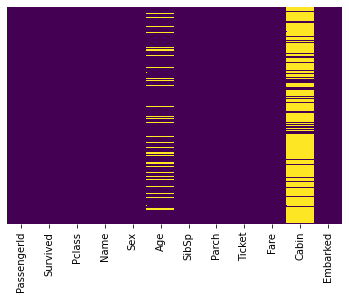

In [ ]:
# Looking for missing values (null and/or NaN)
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [ ]:
# Print a summary of variables with null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Get rid of the cabin variable
df.drop('Cabin', axis=1, inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [ ]:
# Look at those entries without NaN age
# ==Q== ¿Qué imprimen cada una de las la siguientes líneas de código?
df.Age.isnull()

~df.Age.isnull()

df[~df.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [ ]:
# See at the average age of valid values
print(f"Average age: {df[~df.Age.isnull()].Age.mean():.1f}")

Average age: 29.7


In [ ]:
# Assign the average age value to all of its NaN's
# ==Q== ¿Cómo lo harías?

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


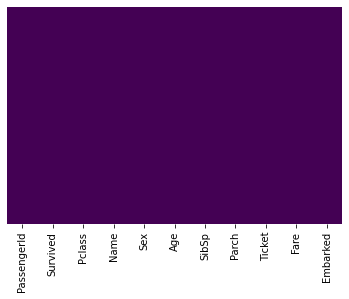

In [ ]:
# Look again for missing values (null and/or NaN)
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
# Look at how balanced in the target variable
survived_count = df.groupby('Survived')['Survived'].count()
survived_count

Survived
0    549
1    342
Name: Survived, dtype: int64

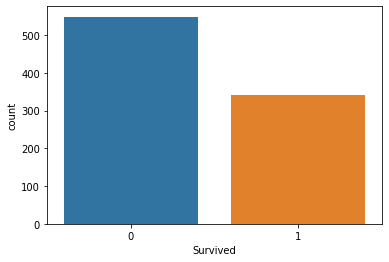

In [ ]:
# See distribution of target variable
sns.countplot(x='Survived', data=df)
plt.show()

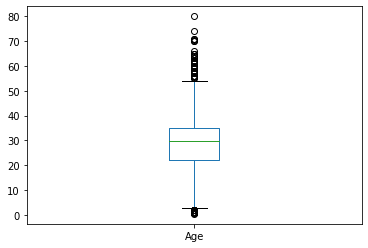

In [ ]:
# Distribution of one column
# ==Q== Investiga cómo generar el boxplot de la variable 'Age'

plt.show()

In [ ]:
plt.show?

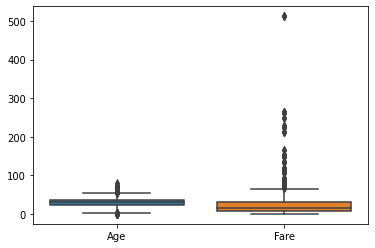

In [ ]:
# More than one variable
# ==Q== Investiga cómo generar el boxplot de dos variables, una junto a la otra.
# Usa 'Age' y 'Fare'

plt.show()

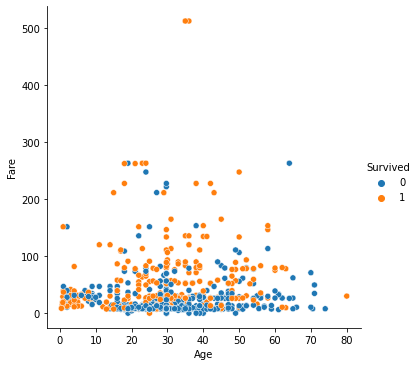

In [ ]:
# Correlation
# ==Q== Investiga cómo generar una gráfica de puntos que represente la correlación
# entre las variables 'Age' y 'Fare'

plt.show()

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64


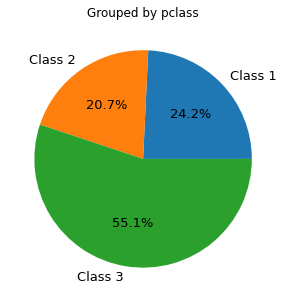

In [ ]:
# Look at the distribution of passenger-classes
pclass_count = df.groupby('Pclass')['Pclass'].count()
print(pclass_count)

plt.figure(figsize=(5, 5))
plt.title('Grouped by pclass')
plt.pie(pclass_count.values, labels=['Class 1', 'Class 2', 'Class 3'], autopct='%1.1f%%', textprops={'fontsize': 13})
plt.show()

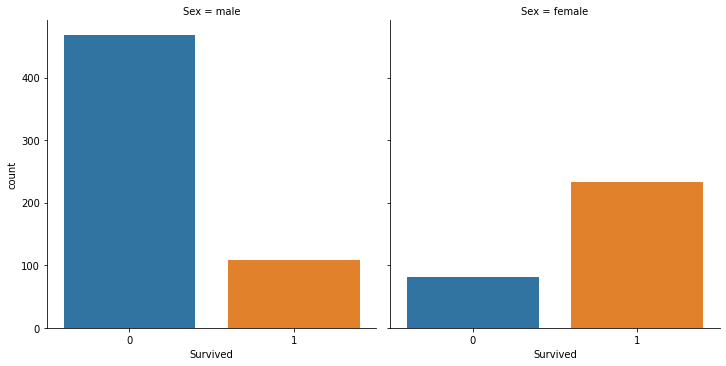

In [ ]:
# See some correlations (gender)
sns.catplot(x='Survived', col='Sex', kind='count', data=df)
plt.show()

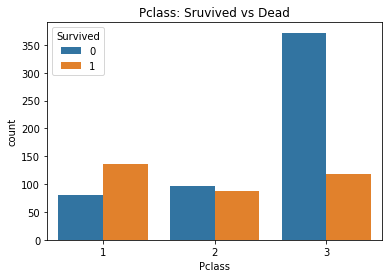

In [ ]:
# More on correlations
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Pclass: Sruvived vs Dead')
plt.show()

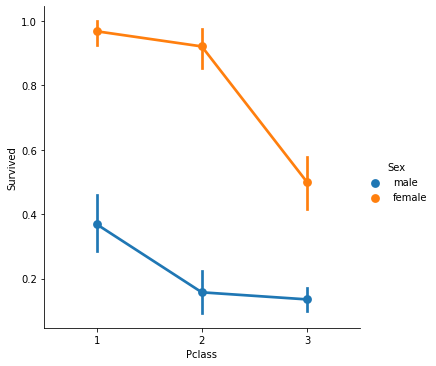

In [ ]:
# Look at them from different perspective
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df, kind='point')
plt.show()

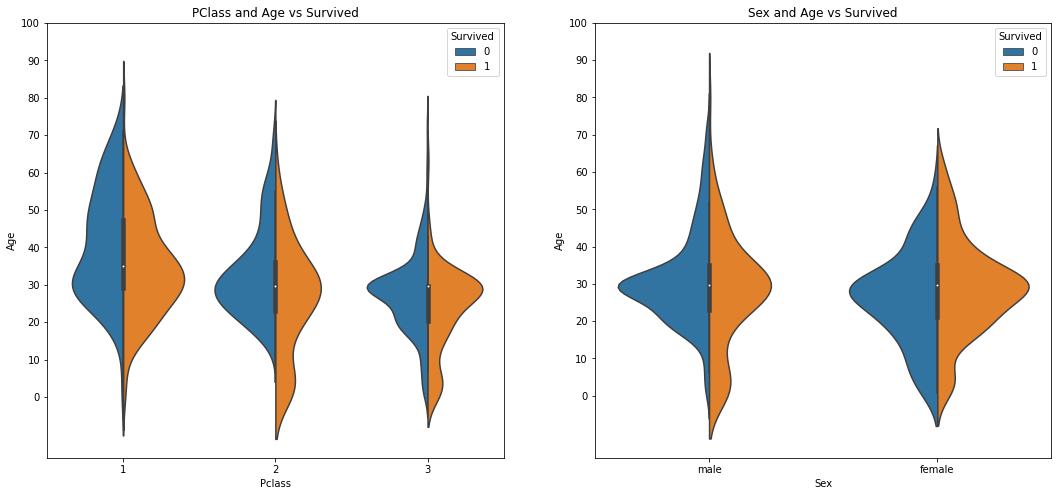

In [ ]:
# Correlation of two variables + target variable
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df, split=True, ax=ax[0])
ax[0].set_title('PClass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot(x="Sex", y="Age", hue="Survived", data=df, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

In [ ]:
# More correlation
corr = df.corr()
corr
# ==Q== ¿Qué limitación encuentras en esta tabla?

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


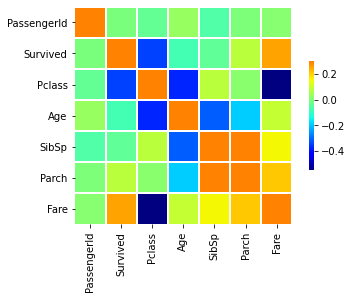

In [ ]:
# Plot the correlation matrix
sns.heatmap(corr, vmax=.3, center=0, cmap='jet', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

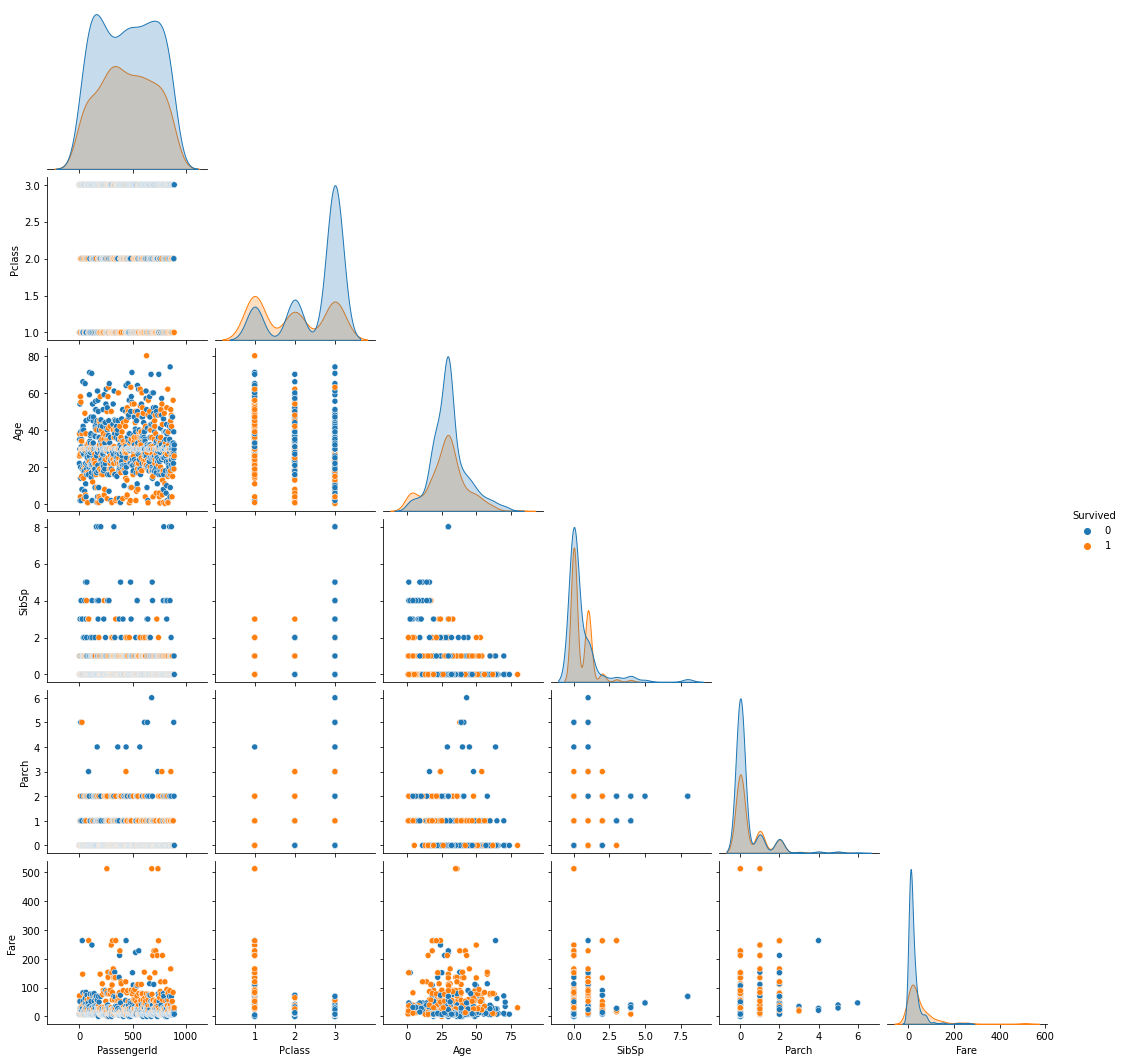

In [ ]:
# Pairwise correlation
sns.pairplot(df, hue="Survived", corner=True)
plt.show()

In [ ]:
# ==Q== Tomando en consideración la exploración de variables que acabamos de
# realizar, ¿cuáles variables consideras que deben ser usadas como predictores
# de la variable objetivo? Reporta sus estádisticas relevantes, y correlaciones 
# entre ellas y con la variable objetivo.